# HH model

--> biophysical neuron modeling that assume neurons are like electric circuits. characterized by gates: activation, inactivation for both sodium and potassium. (In neurons there are Na+ (sodium) which is scarce, and potassium (K+) which is abundant inside the cell). 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint, ode

m is for sodium activation

In [2]:
# Sodium channel acitivation gate
# m is for sodium activation
def alpha_m(v):
    # sodium activation gate opening rate
    return 0.1*(v+40)/(1-np.exp(-(v+40)/10))
    # the 40 here is the voltage at rest
def beta_m(v):
    # sodium activation gate closing rate
    return 4*np.exp(-(v+65)/18)
    # the number 65 is the threshold of voltage to get into action potentials
def m_inf(v):
    # equilibrium activation: alpha_m*(1-m) - beta_m*m = 0
    return alpha_m(v)/(alpha_m(v) + beta_m(v))

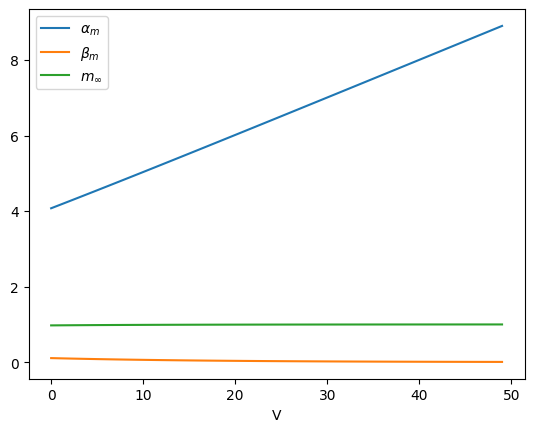

In [ ]:
# Voltage depedence of sodium activation gate
v = np.arange(-80, 40)
plt.plot(v, alpha_m(v))
plt.plot(v, beta_m(v))
plt.plot(v, m_inf(v));
plt.xlabel('V');
plt.legend(['$\\alpha_m$', '$\\beta_m$', '$m_\\infty$']);

h is for sodium inactivation

In [3]:
# Sodium channel inactivation gate
def alpha_h(v):
    # sodium inactivation gate opening rate
    return 0.07*np.exp(-(v+65)/20)
def beta_h(v):
    # sodium inactivation gate closing rate
    return 1/(1+np.exp(-(v+35)/10))
def h_inf(v):
    # equilibrium inactivation: alpha_h*(1-h) - beta_h*h = 0
    return alpha_h(v)/(alpha_h(v) + beta_h(v))

n is for potassium activation

In [4]:
# Potassium channel acitivation gate
def alpha_n(v):
    # sodium activation gate opening rate
    return 0.01*(v+55)/(1-np.exp(-(v+55)/10))
def beta_n(v):
    # sodium activation gate closing rate
    return 0.125*np.exp(-(v+65)/80)
def n_inf(v):
    # equilibrium activation: alpha_n*(1-n) - beta_n*n = 0
    return alpha_n(v)/(alpha_n(v) + beta_n(v))

HH model

In [5]:
# HH: Hodgkin-Huxley (1952) model
C = 1.    # membrane capacitance (uF/cm^2)
# maximum conductances (uS/cm^2)
gna = 120.  # sodium
gk = 36.    # potassium
gl = 0.3   # leak
# reversal potentials (mV)
Ena = 50.   # sodium
Ek = -77.   # potassium
El = -54.4 # leak
def hh(y, t, stim=0.):    
    # state variables: potential and activation/inactivation
    v, m, h, n = y
    # membrane potential
    if callable(stim):
        I = stim(t)  # time-dependent
    else:
        I = stim  # constant
    dv = (gna*m**3*h*(Ena-v) + gk*n**4*(Ek-v) + gl*(El-v) + I)/C
    # sodium current activation
    dm = alpha_m(v)*(1-m) - beta_m(v)*m
    # sodium current inactivation
    dh = alpha_h(v)*(1-h) - beta_h(v)*h
    # potassium current activation
    dn = alpha_n(v)*(1-n) - beta_n(v)*n
    return [ dv, dm, dh, dn]

In [6]:
# current stimulus I (uA/cm^2)
def ramp(t):
    return 0.1*np.array(t)  # ramp current

simulate

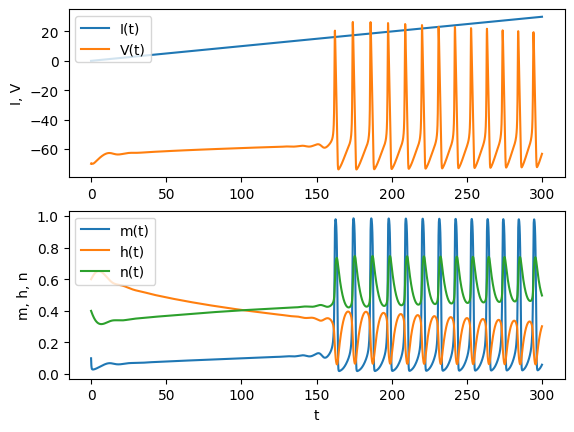

In [7]:
# run a simulation with ramping
tt = np.arange(0, 300, 0.1)  # time to be simulated
y0 = [ -70, 0.1, 0.6, 0.4]  # initial state: V, m, h, n
yt = odeint(hh, y0, tt, args=(ramp,))   # simulated output
# plot in separate rows
plt.subplot(2, 1, 1)
plt.plot(tt, ramp(tt));  # stim
plt.plot(tt, yt[:,0]);   # Ie, V
plt.ylabel("I, V");
plt.legend(("I(t)", "V(t)"), loc='upper left');
plt.subplot(2, 1, 2)
plt.plot(tt, yt[:,1:]);  # m, h, n
plt.xlabel("t")
plt.ylabel("m, h, n");
plt.legend(("m(t)", "h(t)", "n(t)"), loc='upper left');